# Background

In the period 1962-77, 205 patients with malignant melanoma (cancer of
the skin) had a radical operation performed at Odense University
Hospital, Denmark. All patients were followed until the end of 1977 by 
which time 134 were still alive while 71 had died (of out whom 57 had
died from cancer and 14 from other causes).

The object of the study was to assess the effect of risk factors on
survival. Among such risk factors were the sex and age of the patients
and the histological variables tumor thickness and ulceration (absent
vs. present)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('Melanoma.csv', delimiter=';')

In [6]:
data.head()

,dc,days,level,ici,ecel,ulc,thick,sex,age
0,3,10,1,2,2,1,6.76,1,76
1,3,30,0,0,1,0,0.65,1,56
2,2,35,1,2,1,0,1.34,1,41
3,3,99,0,2,1,0,2.90,0,71
4,1,185,2,2,2,1,12.08,1,52


# Attributes

DC --	 death/censoring indicator 
	 1 = death from malignant melanoma, 
         2 = alive 31DEC77, 
         3 = death from other causes

DAYS --	 time in days from operation

LEVEL --	 level of invasion, 0, 1 or 2

ICI --	 inflammatory cell infiltration (ICI), 0, 1, 2 or 3

ECEL --	 presence of epithelioid cells, 1=no, 2=yes

ULC --	 presence of ulceration, 0=no, 1=yes

THICK --	 tumour thickness (in mm)

SEX --	 sex, 0=F, 1=M

AGE --	 age at operation (years)

In [17]:
data.describe()

,dc,days,level,ici,ecel,ulc,thick,sex,age
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.790244,2152.800000,0.658537,1.653659,1.434146,0.439024,2.919854,0.385366,52.463415
std,0.551204,1122.060667,0.714340,0.780930,0.496858,0.497483,2.959433,0.487873,16.671711
min,1.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.100000,0.000000,4.000000
25%,1.000000,1525.000000,0.000000,1.000000,1.000000,0.000000,0.970000,0.000000,42.000000
50%,2.000000,2005.000000,1.000000,2.000000,1.000000,0.000000,1.940000,0.000000,54.000000
75%,2.000000,3042.000000,1.000000,2.000000,2.000000,1.000000,3.560000,1.000000,65.000000
max,3.000000,5565.000000,2.000000,3.000000,2.000000,1.000000,17.420000,1.000000,95.000000


In [18]:
data.dtypes

dc         int64
days       int64
level      int64
ici        int64
ecel       int64
ulc        int64
thick    float64
sex        int64
age        int64
dtype: object

In [7]:
data['dc'].value_counts()

2    134
1     57
3     14
Name: dc, dtype: int64

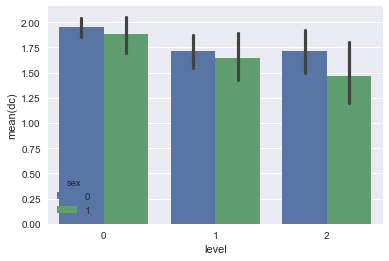

In [8]:
sns.barplot(x='level', y='dc', hue='sex', data=data)

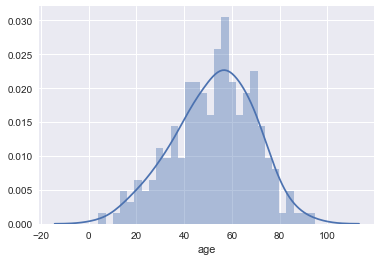

In [15]:
sns.distplot(data.age, bins=30)                  

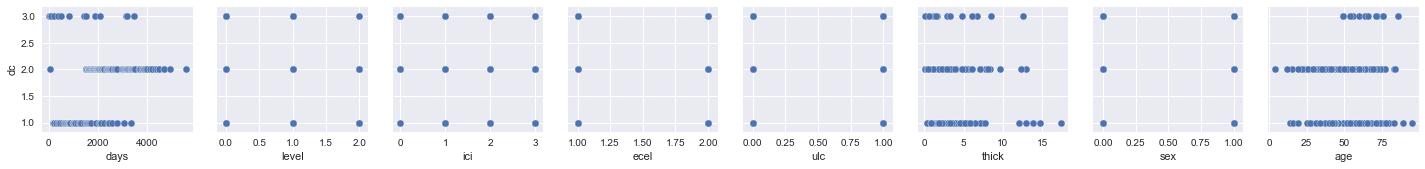

In [20]:
sns.pairplot(data, x_vars=['days', 'level', 'ici', 'ecel', 'ulc', 'thick', 'sex', 'age'], y_vars= 'dc')

In [22]:
# First try prediction with all attributes
X = data[['days', 'level', 'ici', 'ecel', 'ulc', 'thick', 'sex', 'age']]
y = data['dc']
print (X.shape)
print (y.shape)

(205, 8)
(205,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# Multinomial Naive-Bayes

In [24]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [25]:
# train the model using X_train_dtm
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test)
y_pred_class

array([1, 2, 1, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       3, 2, 1, 2, 3, 3], dtype=int64)

In [28]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.73076923076923073

In [29]:
# calculate the null accuracy
y_test.value_counts().head(1) / y_test.shape

2    0.711538
Name: dc, dtype: float64

In [30]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 7,  2,  4],
       [ 5, 30,  2],
       [ 1,  0,  1]])

In [31]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          1       0.54      0.54      0.54        13
          2       0.94      0.81      0.87        37
          3       0.14      0.50      0.22         2

avg / total       0.81      0.73      0.76        52



# Logistic Regression

In [69]:
# import and instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

# fit and predict
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.67307692307692313

In [70]:
y_pred_class

array([3, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1, 3, 2, 1, 3, 1,
       3, 2, 1, 2, 3, 1], dtype=int64)

In [71]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 4,  4,  5],
       [ 4, 29,  4],
       [ 0,  0,  2]])

In [72]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          1       0.50      0.31      0.38        13
          2       0.88      0.78      0.83        37
          3       0.18      1.00      0.31         2

avg / total       0.76      0.67      0.70        52

